=== Data Sensor ICP-MS (500000000 Baris) ===
                  created_at  field1  field2
0  2025-10-16 07:56:46+00:00    25.4    58.8
2  2025-10-16 07:58:58+00:00    25.2    50.5
4  2025-10-16 08:01:02+00:00    25.3    58.6
6  2025-10-16 08:03:07+00:00    25.3    52.8
25 2025-10-16 08:30:48+00:00    25.0    59.0

Jumlah baris data valid: 1469
✅ Data disimpan ke: thingspeak_icpms_1000_20251025_051938.csv


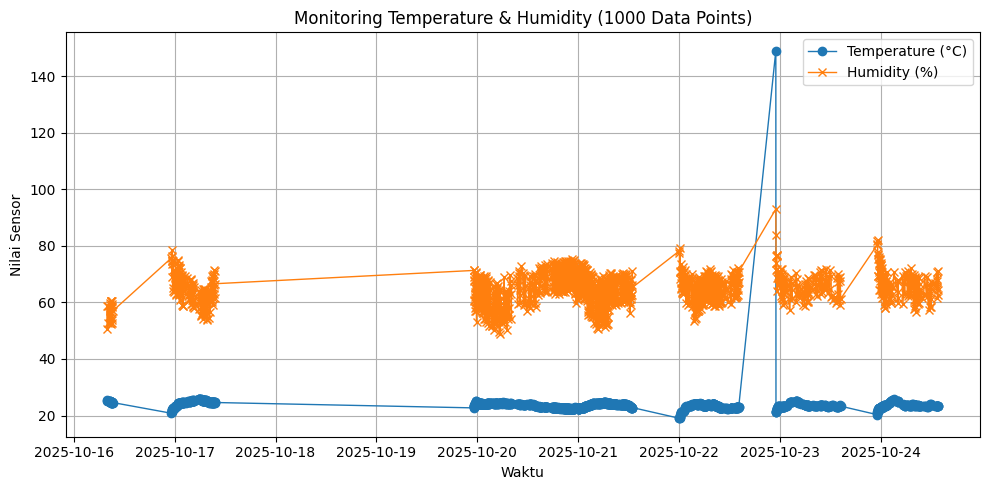


=== Statistik Data ===
            field1      field2
count  1469.000000  1469.00000
mean     23.699319    64.96290
std       3.396344     5.32083
min      19.000000    48.90000
25%      22.900000    61.60000
50%      23.700000    65.20000
75%      24.200000    68.70000
max     149.000000    93.00000


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# === Informasi Kanal ThingSpeak ===
CHANNEL_ID = "2618552"
READ_API_KEY = "PSFJBW7CPMC9N8MO"
URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json"

# === Fungsi untuk Mengambil Data dari ThingSpeak ===
def get_data(results=1000):
    params = {"api_key": READ_API_KEY, "results": results}
    response = requests.get(URL, params=params)

    if response.status_code == 200:
        data = response.json()
        feeds = data["feeds"]
        df = pd.DataFrame(feeds)

        # Ambil kolom waktu + field1 dan field2 saja
        df = df[["created_at", "field1", "field2"]]

        # Konversi tipe data
        df["created_at"] = pd.to_datetime(df["created_at"])
        df["field1"] = pd.to_numeric(df["field1"], errors="coerce")
        df["field2"] = pd.to_numeric(df["field2"], errors="coerce")

        # Hapus baris kosong
        df = df.dropna(subset=["field1", "field2"], how="all")

        return df
    else:
        print(" Gagal mengambil data:", response.status_code)
        return pd.DataFrame()

# === Ambil data 1000 baris ===
df = get_data(1000)

if df.empty:
    print("Tidak ada data yang berhasil diambil.")
else:
    print("=== Data Sensor ICP-MS (1000 Baris) ===")
    print(df.head())
    print(f"\nJumlah baris data valid: {len(df)}")

    # === Simpan ke CSV ===
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f"thingspeak_icpms_1000_{timestamp}.csv"
    df.to_csv(csv_filename, index=False)
    print(f" Data disimpan ke: {csv_filename}")

    # === Visualisasi ===
    plt.figure(figsize=(10, 5))
    plt.plot(df["created_at"], df["field1"], label="Temperature (°C)", marker="o", linewidth=1)
    plt.plot(df["created_at"], df["field2"], label="Humidity (%)", marker="x", linewidth=1)
    plt.title("Monitoring Temperature & Humidity (1000 Data Points)")
    plt.xlabel("Waktu")
    plt.ylabel("Nilai Sensor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Analisis singkat ===
    print("\n=== Statistik Data ===")
    print(df[["field1", "field2"]].describe())


Codingan Lanjutan

Jalankan library yang dibutuhkan<br>
Import semua pustaka yang diperlukan dalam project.<br>
Ambil data secara realtime<br><br>
Tarik data dari sumber yang dipilih (contoh: Yahoo Finance atau perangkat IoT) dan tampilkan dalam bentuk dataframe sebagai bukti keberhasilan pengambilan data.<br>
Bangun model prediksi atau klasifikasi (Pilih salah satu)<br>
Kembangkan model sesuai pendekatan yang dipilih:<br>
a. Prediksi beberapa periode ke depan<br>
b.Klasifikasi berdasarkan data deret waktu (time series)<br>
Evaluasi performa model<br>
Tentukan metrik evaluasi yang digunakan dan hitung nilai kebaikan dari model yang telah dibuat.<br>
Uji model dengan data baru<br>
Uji performa model menggunakan data baru (di luar dataframe awal) untuk mengetahui kemampuan model dalam melakukan prediksi atau klasifikasi terhadap data yang belum pernah dilihat sebelumnya. <br>
Penilaian  : Penilaian dilakukan dihari sabtu 25 Oktober 2025 dengan mempersentasikan hasil pekerjaan nya. (Jika mahasiswa mampu memvisualisasikan model dengan streamlit (UI) menjadi nilai tambah).<br>

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
data = pd.read_csv('thingspeak_icpms_1000_20251024_192409.csv')
data.head()

,created_at,field1,field2
0,2025-10-16 00:03:37+00:00,22.9,70.0
1,2025-10-16 00:05:46+00:00,22.9,65.4
2,2025-10-16 00:18:38+00:00,23.0,63.7
3,2025-10-16 00:20:44+00:00,22.8,63.4
4,2025-10-16 00:25:00+00:00,23.0,62.7


In [33]:
#Ubah nama kolom field1 dan field2
data.rename(columns={'field1':'Temperature', 'field2':'Humidity'}, inplace=True)
data.head()

,created_at,Temperature,Humidity
0,2025-10-16 00:03:37+00:00,22.9,70.0
1,2025-10-16 00:05:46+00:00,22.9,65.4
2,2025-10-16 00:18:38+00:00,23.0,63.7
3,2025-10-16 00:20:44+00:00,22.8,63.4
4,2025-10-16 00:25:00+00:00,23.0,62.7


In [4]:
#Analisis Data Awal
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   1603 non-null   object 
 1   Temperature  1603 non-null   float64
 2   Humidity     1603 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.7+ KB


created_at     0
Temperature    0
Humidity       0
dtype: int64

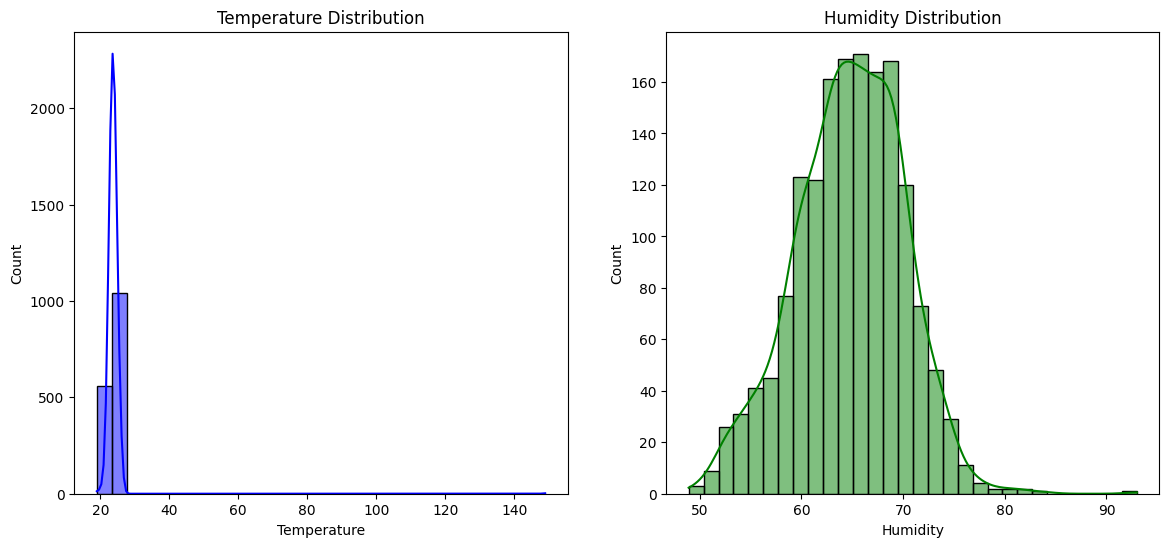

In [34]:
#lanjut analisis data lanjutan
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data['Temperature'].dropna(), bins=30, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.subplot(1,2,2)
sns.histplot(data['Humidity'].dropna(), bins=30, kde=True, color='green')
plt.title('Humidity Distribution')
plt.show()

In [49]:
summary = data[['Temperature', 'Humidity']].describe()
print(summary)

       Temperature     Humidity
count  1504.000000  1504.000000
mean     23.791889    64.709120
std       1.115209     3.562084
min      20.634417    55.854274
25%      23.025239    62.402458
50%      23.812598    64.652385
75%      24.321016    67.006122
max      32.014371    74.122582


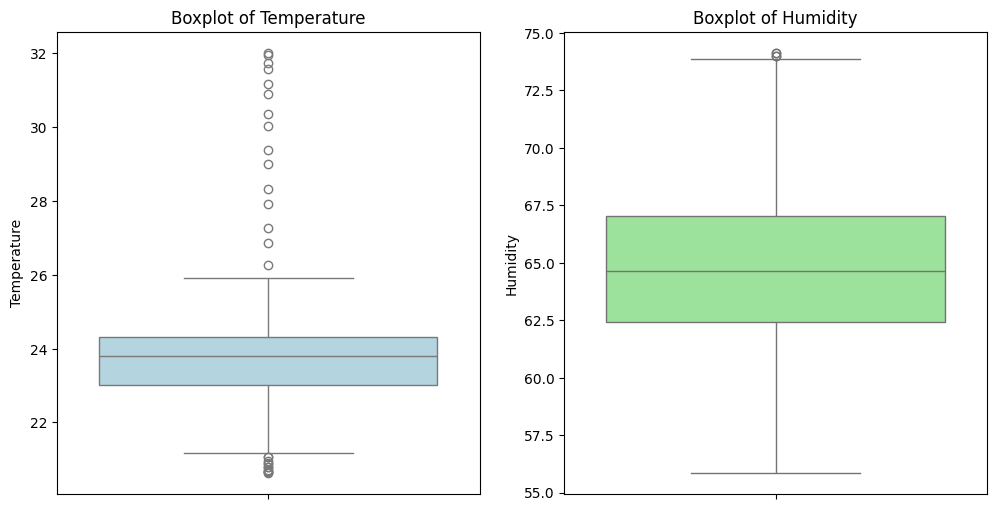

In [52]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=data['Temperature'], ax=ax[0], color='lightblue')
ax[0].set_title('Boxplot of Temperature')
sns.boxplot(y=data['Humidity'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot of Humidity')
plt.show()

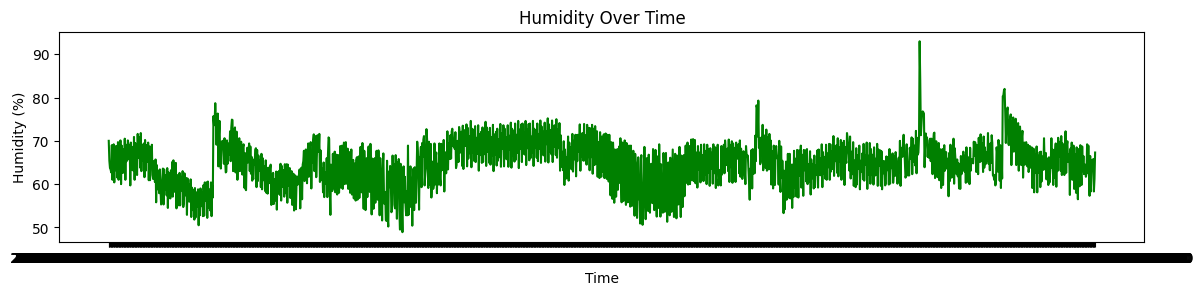

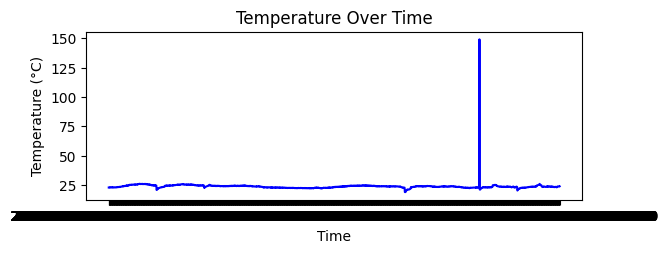

In [35]:
#ploting data time series
plt.figure(figsize=(14,6))
plt.subplot(2,1,2)
plt.plot(data['created_at'], data['Humidity'], color='green')
plt.title('Humidity Over Time' )
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.show()
plt.subplot(2,1,1)
plt.plot(data['created_at'], data['Temperature'], color='blue')
plt.title('Temperature Over Time' )
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

=== Evaluasi Model Temperature ===
Random Forest   -> RMSE: 0.848, R²: 0.673
XGBoost         -> RMSE: 0.881, R²: 0.647
LSTM            -> RMSE: 0.481, R²: 0.895

=== Evaluasi Model Humidity ===
Random Forest   -> RMSE: 0.881, R²: 0.890
XGBoost         -> RMSE: 1.011, R²: 0.855
LSTM            -> RMSE: 0.542, R²: 0.958


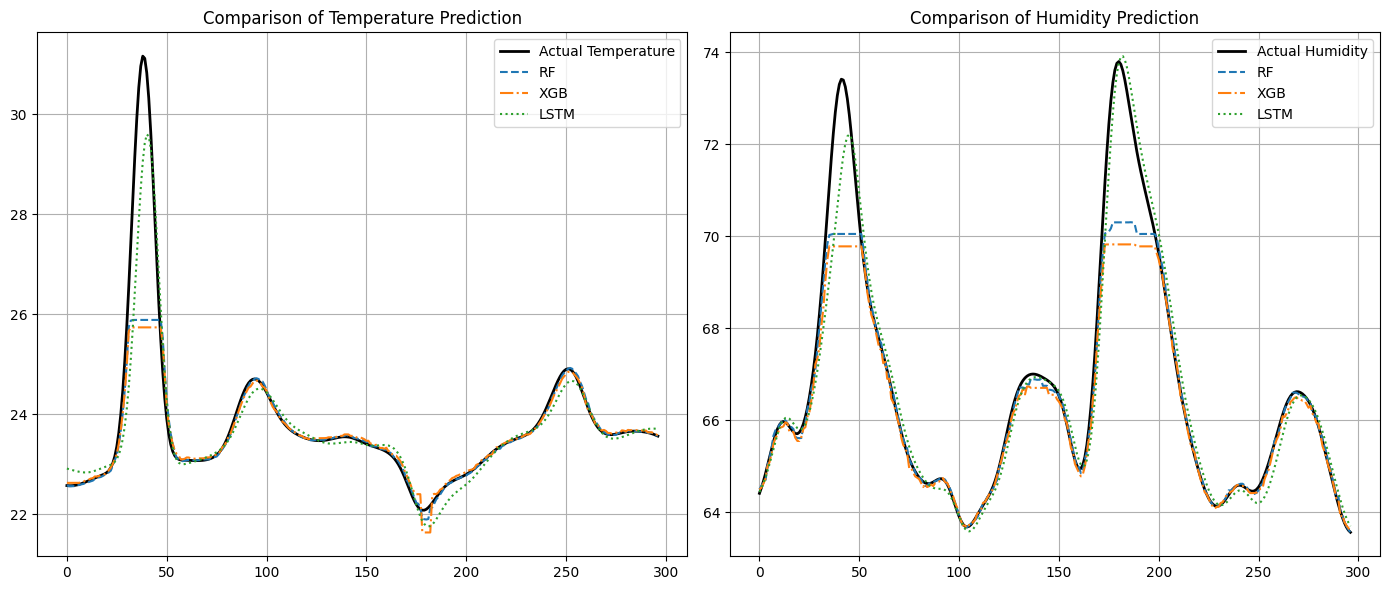

In [63]:
# === Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# === Persiapan Data ===
data.rename(columns={'field1': 'Temperature', 'field2': 'Humidity'}, inplace=True)
data = data.dropna(subset=['Temperature', 'Humidity'])

# Haluskan data
data['Temperature'] = data['Temperature'].rolling(window=6).mean()
data['Humidity'] = data['Humidity'].rolling(window=6).mean()
data = data.dropna()

# Buat fitur lag 
for lag in range(1, 7):
    data[f'Temp_t-{lag}'] = data['Temperature'].shift(lag)
    data[f'Hum_t-{lag}'] = data['Humidity'].shift(lag)
data = data.dropna()

# Fitur dan target
X = data[[f'Temp_t-{i}' for i in range(1,4)] + [f'Hum_t-{i}' for i in range(1,4)]]
y_temp = data['Temperature']
y_hum  = data['Humidity']

# Normalisasi
scaler_X = MinMaxScaler()
scaler_y_temp = MinMaxScaler()
scaler_y_hum = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_temp_scaled = scaler_y_temp.fit_transform(y_temp.values.reshape(-1, 1))
y_hum_scaled = scaler_y_hum.fit_transform(y_hum.values.reshape(-1, 1))

# Split data (80:20)
split_idx = int(len(X_scaled)*0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_temp_train, y_temp_test = y_temp_scaled[:split_idx], y_temp_scaled[split_idx:]
y_hum_train, y_hum_test = y_hum_scaled[:split_idx], y_hum_scaled[split_idx:]

# === Model Random Forest ===
rf_temp = RandomForestRegressor(n_estimators=300, random_state=42)
rf_hum  = RandomForestRegressor(n_estimators=300, random_state=42)
rf_temp.fit(X_train, y_temp_train.ravel())
rf_hum.fit(X_train, y_hum_train.ravel())
y_temp_rf = rf_temp.predict(X_test)
y_hum_rf  = rf_hum.predict(X_test)

# === Model XGBoost ===
xgb_temp = XGBRegressor(n_estimators=300, learning_rate=0.01, max_depth=30, random_state=42)
xgb_hum  = XGBRegressor(n_estimators=300, learning_rate=0.01, max_depth=30, random_state=42)
xgb_temp.fit(X_train, y_temp_train.ravel())
xgb_hum.fit(X_train, y_hum_train.ravel())
y_temp_xgb = xgb_temp.predict(X_test)
y_hum_xgb  = xgb_hum.predict(X_test)

# ===  Model LSTM ===
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_temp = Sequential([
    LSTM(32, activation='tanh', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_temp.compile(optimizer='adam', loss='mse')
model_temp.fit(X_train_lstm, y_temp_train, epochs=4, batch_size=8, verbose=0)

model_hum = Sequential([
    LSTM(32, activation='tanh', input_shape=(1, X_train.shape[1])),
    Dense(1)
])
model_hum.compile(optimizer='adam', loss='mse')
model_hum.fit(X_train_lstm, y_hum_train, epochs=4, batch_size=8, verbose=0)

y_temp_lstm = model_temp.predict(X_test_lstm)
y_hum_lstm  = model_hum.predict(X_test_lstm)

# === Inverse Transform ===
def inverse(scaler, arr): return scaler.inverse_transform(arr.reshape(-1, 1))

y_temp_test_inv = inverse(scaler_y_temp, y_temp_test)
y_hum_test_inv  = inverse(scaler_y_hum, y_hum_test)

y_temp_rf_inv = inverse(scaler_y_temp, y_temp_rf)
y_hum_rf_inv  = inverse(scaler_y_hum, y_hum_rf)
y_temp_xgb_inv = inverse(scaler_y_temp, y_temp_xgb)
y_hum_xgb_inv  = inverse(scaler_y_hum, y_hum_xgb)
y_temp_lstm_inv = inverse(scaler_y_temp, y_temp_lstm)
y_hum_lstm_inv  = inverse(scaler_y_hum, y_hum_lstm)

# === Evaluasi Semua Model ===
def evaluate(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)), r2_score(y_true, y_pred)

results = {
    "Random Forest": evaluate(y_temp_test_inv, y_temp_rf_inv),
    "XGBoost": evaluate(y_temp_test_inv, y_temp_xgb_inv),
    "LSTM": evaluate(y_temp_test_inv, y_temp_lstm_inv)
}

print("\n=== Evaluasi Model Temperature ===")
for model, (rmse, r2) in results.items():
    print(f"{model:15s} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

results_hum = {
    "Random Forest": evaluate(y_hum_test_inv, y_hum_rf_inv),

    
    "XGBoost": evaluate(y_hum_test_inv, y_hum_xgb_inv),
    "LSTM": evaluate(y_hum_test_inv, y_hum_lstm_inv)
}

print("\n=== Evaluasi Model Humidity ===")
for model, (rmse, r2) in results_hum.items():
    print(f"{model:15s} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

# === Visualisasi Perbandingan ===
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(y_temp_test_inv, label="Actual Temperature", color='black', linewidth=2)
plt.plot(y_temp_rf_inv, label="RF", linestyle='--')
plt.plot(y_temp_xgb_inv, label="XGB", linestyle='-.')
plt.plot(y_temp_lstm_inv, label="LSTM", linestyle=':')
plt.title("Comparison of Temperature Prediction")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y_hum_test_inv, label="Actual Humidity", color='black', linewidth=2)
plt.plot(y_hum_rf_inv, label="RF", linestyle='--')
plt.plot(y_hum_xgb_inv, label="XGB", linestyle='-.')
plt.plot(y_hum_lstm_inv, label="LSTM", linestyle=':')
plt.title("Comparison of Humidity Prediction")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

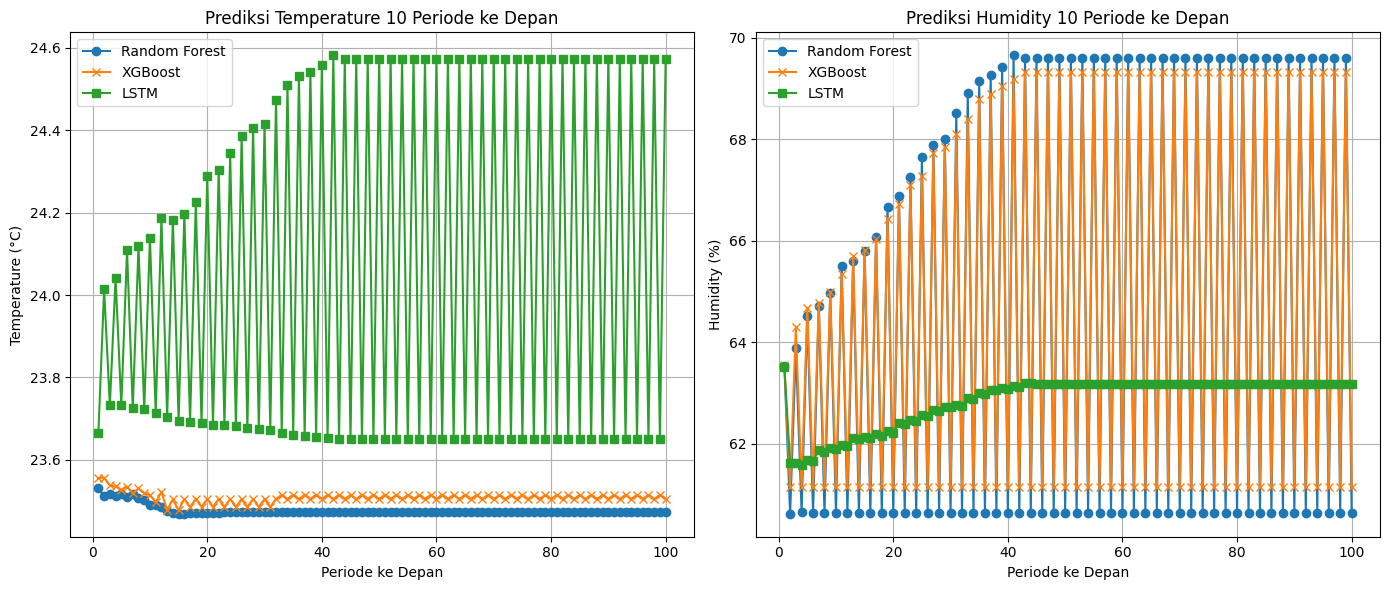

In [58]:
#Prediksi beberapa periode ke depan menggunakan model Random Forest, XGBoost, dan LSTM yang telah dilatih sebelumnya
future_steps = 100  # Jumlah periode ke depan yang ingin diprediksi
last_known = X_test[-1].reshape(1, -1)  # Ambil data terakhir dari set uji
predictions_rf_temp = []
predictions_xgb_temp = []
predictions_lstm_temp = []
predictions_rf_hum = []
predictions_xgb_hum = []
predictions_lstm_hum = []
for _ in range(future_steps):
    # Prediksi dengan Random Forest
    pred_rf_temp = rf_temp.predict(last_known)
    pred_rf_hum = rf_hum.predict(last_known)
    predictions_rf_temp.append(pred_rf_temp[0])
    predictions_rf_hum.append(pred_rf_hum[0])
    
    # Prediksi dengan XGBoost
    pred_xgb_temp = xgb_temp.predict(last_known)
    pred_xgb_hum = xgb_hum.predict(last_known)
    predictions_xgb_temp.append(pred_xgb_temp[0])
    predictions_xgb_hum.append(pred_xgb_hum[0])
    
    # Prediksi dengan LSTM
    last_known_lstm = last_known.reshape((1, 1, last_known.shape[1]))
    pred_lstm_temp = model_temp.predict(last_known_lstm)
    pred_lstm_hum = model_hum.predict(last_known_lstm)
    predictions_lstm_temp.append(pred_lstm_temp[0][0])
    predictions_lstm_hum.append(pred_lstm_hum[0][0])
    
    # Update last_known untuk iterasi berikutnya
    new_entry = np.array([pred_rf_temp[0], pred_rf_hum[0]] + list(last_known[0][:-2]))
    last_known = new_entry.reshape(1, -1)
# Inverse transform prediksi ke nilai asli
predictions_rf_temp_inv = inverse(scaler_y_temp, np.array(predictions_rf_temp))
predictions_rf_hum_inv = inverse(scaler_y_hum, np.array(predictions_rf_hum))
predictions_xgb_temp_inv = inverse(scaler_y_temp, np.array(predictions_xgb_temp))
predictions_xgb_hum_inv = inverse(scaler_y_hum, np.array(predictions_xgb_hum))
predictions_lstm_temp_inv = inverse(scaler_y_temp, np.array(predictions_lstm_temp))
predictions_lstm_hum_inv = inverse(scaler_y_hum, np.array(predictions_lstm_hum))
# Tampilkan hasil prediksi
print("\n=== Prediksi 10 Periode ke Depan ===")
for i in range(future_steps):
    print(f"Periode {i+1}:")
    print(f"  Random Forest    -> Temperature: {predictions_rf_temp_inv[i][0]:.2f}, Humidity: {predictions_rf_hum_inv[i][0]:.2f}")
    print(f"  XGBoost         -> Temperature: {predictions_xgb_temp_inv[i][0]:.2f}, Humidity: {predictions_xgb_hum_inv[i][0]:.2f}")
    print(f"  LSTM            -> Temperature: {predictions_lstm_temp_inv[i][0]:.2f}, Humidity: {predictions_lstm_hum_inv[i][0]:.2f}")

#plot hasil prediksi
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(1, future_steps+1), predictions_rf_temp_inv, label="Random Forest", marker='o')
plt.plot(range(1, future_steps+1), predictions_xgb_temp_inv, label="XGBoost", marker='x')
plt.plot(range(1, future_steps+1), predictions_lstm_temp_inv, label="LSTM", marker='s')
plt.title("Prediksi Temperature 10 Periode ke Depan")
plt.xlabel("Periode ke Depan")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, future_steps+1), predictions_rf_hum_inv, label="Random Forest", marker='o')
plt.plot(range(1, future_steps+1), predictions_xgb_hum_inv, label="XGBoost", marker='x')
plt.plot(range(1, future_steps+1), predictions_lstm_hum_inv, label="LSTM", marker='s')
plt.title("Prediksi Humidity 10 Periode ke Depan")
plt.xlabel("Periode ke Depan")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# === Load Data ===
data = pd.read_csv('thingspeak_icpms_1000_20251024_192409.csv')
data.head()




,created_at,field1,field2
0,2025-10-16 00:03:37+00:00,22.9,70.0
1,2025-10-16 00:05:46+00:00,22.9,65.4
2,2025-10-16 00:18:38+00:00,23.0,63.7
3,2025-10-16 00:20:44+00:00,22.8,63.4
4,2025-10-16 00:25:00+00:00,23.0,62.7


=== Evaluasi Model ARIMA ===
Suhu (field1): RMSE=7.187, MAE=1.515, R²=-0.042
Kelembaban (field2): RMSE=5.537, MAE=4.178, R²=-0.308


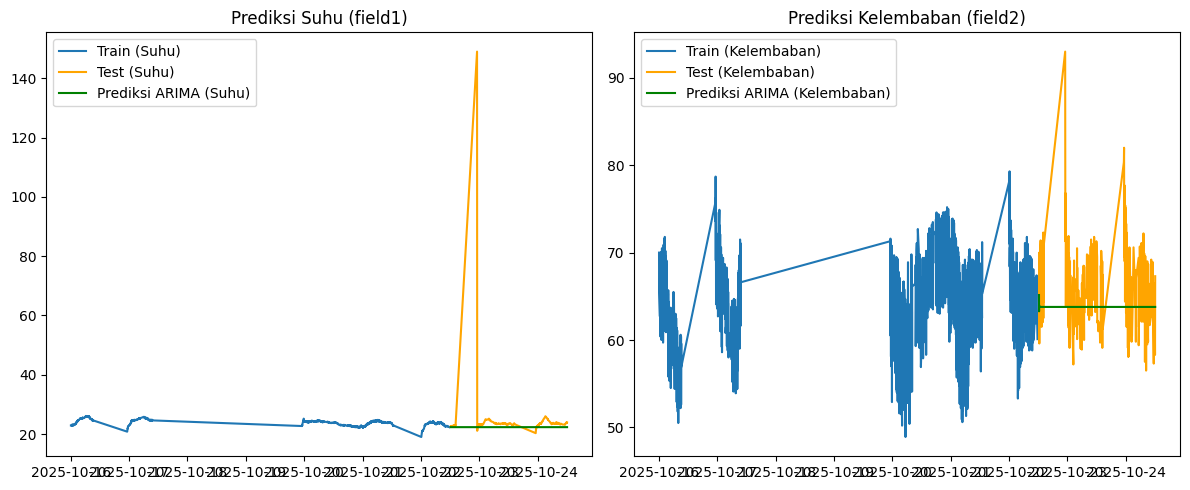

In [60]:
# ==========================================
# ARIMA untuk prediksi suhu dan kelembaban
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 1. Baca data ===
df = pd.read_csv(
    r"D:/KULIAH/S2/Semester 3/Predictive Time Inteligence - 3/Codingan/Codingan_Tugas_KakYosia/thingspeak_icpms_1000_20251024_192409.csv"
)
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

# === 2. Pisahkan data train dan test ===
train_size = int(len(df) * 0.8)
temp_train, temp_test = df['Temperature'][:train_size], df['Temperature'][train_size:]
hum_train, hum_test = df['Humidity'][:train_size], df['Humidity'][train_size:]

# === 3. Bangun model ARIMA ===
model_temp = ARIMA(temp_train, order=(1,1,1))
fit_temp = model_temp.fit()

model_hum = ARIMA(hum_train, order=(1,1,1))
fit_hum = model_hum.fit()

# === 4. Prediksi pada data test ===
temp_pred = fit_temp.forecast(steps=len(temp_test))
hum_pred = fit_hum.forecast(steps=len(hum_test))

# === 5. Evaluasi kinerja ===
def eval_metrics(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return rmse, mae, r2

temp_rmse, temp_mae, temp_r2 = eval_metrics(temp_test, temp_pred)
hum_rmse, hum_mae, hum_r2 = eval_metrics(hum_test, hum_pred)

print("=== Evaluasi Model ARIMA ===")
print(f"Suhu (field1): RMSE={temp_rmse:.3f}, MAE={temp_mae:.3f}, R²={temp_r2:.3f}")
print(f"Kelembaban (field2): RMSE={hum_rmse:.3f}, MAE={hum_mae:.3f}, R²={hum_r2:.3f}")

# === 6. Visualisasi hasil prediksi ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(temp_train, label='Train (Suhu)')
plt.plot(temp_test, label='Test (Suhu)', color='orange')
plt.plot(temp_test.index, temp_pred, label='Prediksi ARIMA (Suhu)', color='green')
plt.title('Prediksi Suhu (field1)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hum_train, label='Train (Kelembaban)')
plt.plot(hum_test, label='Test (Kelembaban)', color='orange')
plt.plot(hum_test.index, hum_pred, label='Prediksi ARIMA (Kelembaban)', color='green')
plt.title('Prediksi Kelembaban (field2)')
plt.legend()
plt.tight_layout()
plt.show()


=== Data Sensor ICP-MS (1000 Baris) ===
                  created_at  field1  field2
7  2025-10-24 08:49:00+00:00    23.6    59.5
10 2025-10-24 08:51:07+00:00    23.7    69.0
15 2025-10-24 08:55:22+00:00    23.5    62.4
34 2025-10-24 09:10:09+00:00    23.3    59.8
36 2025-10-24 09:12:18+00:00    23.3    68.7

Jumlah baris data valid: 37
Data disimpan ke: thingspeak_icpms_1000_20251025_150051.csv


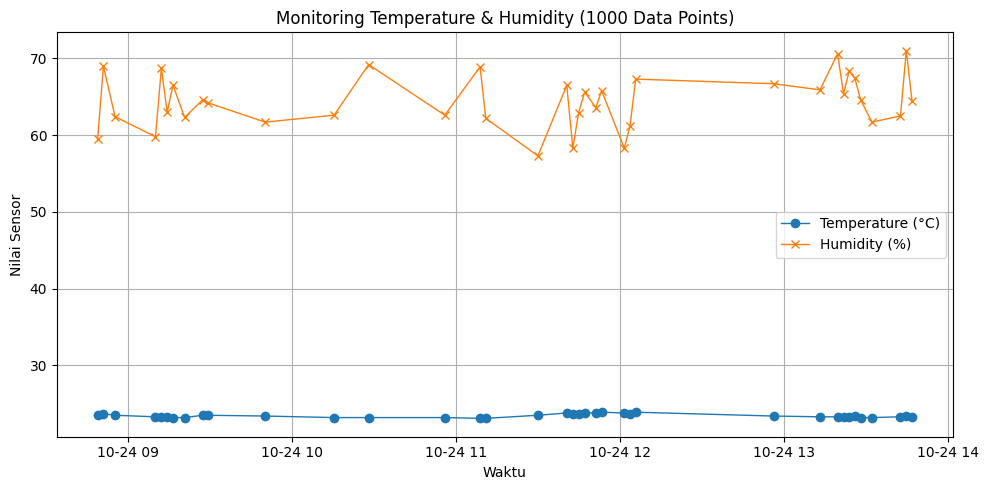


=== Statistik Data ===
          field1     field2
count  37.000000  37.000000
mean   23.440541  64.397297
std     0.239745   3.504956
min    23.100000  57.300000
25%    23.300000  62.300000
50%    23.400000  64.500000
75%    23.700000  66.700000
max    23.900000  71.000000


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# === Informasi Kanal ThingSpeak ===
CHANNEL_ID = "2618552"
READ_API_KEY = "PSFJBW7CPMC9N8MO"
URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json"

# === Fungsi untuk Mengambil Data dari ThingSpeak ===
def get_data(results=1000):
    params = {"api_key": READ_API_KEY, "results": results}
    response = requests.get(URL, params=params)

    if response.status_code == 200:
        data = response.json()
        feeds = data["feeds"]
        df = pd.DataFrame(feeds)

        # Ambil kolom waktu + field1 dan field2 saja
        df = df[["created_at", "field1", "field2"]]

        # Konversi tipe data
        df["created_at"] = pd.to_datetime(df["created_at"])
        df["field1"] = pd.to_numeric(df["field1"], errors="coerce")
        df["field2"] = pd.to_numeric(df["field2"], errors="coerce")

        # Hapus baris kosong
        df = df.dropna(subset=["field1", "field2"], how="all")

        return df
    else:
        print(" Gagal mengambil data:", response.status_code)
        return pd.DataFrame()

# === Ambil data 1000
df = get_data(1000)

if df.empty:
    print("Tidak ada data yang berhasil diambil.")
else:
    print("=== Data Sensor ICP-MS (1000 Baris) ===")
    print(df.head())
    print(f"\nJumlah baris data valid: {len(df)}")

    # === Simpan ke CSV ===
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f"thingspeak_icpms_1000_{timestamp}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Data disimpan ke: {csv_filename}")

    # === Visualisasi ===
    plt.figure(figsize=(10, 5))
    plt.plot(df["created_at"], df["field1"], label="Temperature (°C)", marker="o", linewidth=1)
    plt.plot(df["created_at"], df["field2"], label="Humidity (%)", marker="x", linewidth=1)
    plt.title("Monitoring Temperature & Humidity (1000 Data Points)")
    plt.xlabel("Waktu")
    plt.ylabel("Nilai Sensor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Analisis singkat ===
    print("\n=== Statistik Data ===")
    print(df[["field1", "field2"]].describe())


Data baru berhasil dibaca: 1603 baris
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Evaluasi Model di Data Baru (Temperature) ===
RF    -> RMSE: 1.112, R²: 0.471
XGB   -> RMSE: 1.119, R²: 0.465
LSTM  -> RMSE: 0.946, R²: 0.617

=== Evaluasi Model di Data Baru (Humidity) ===
RF    -> RMSE: 1.244, R²: 0.890
XGB   -> RMSE: 1.284, R²: 0.883
LSTM  -> RMSE: 1.105, R²: 0.913


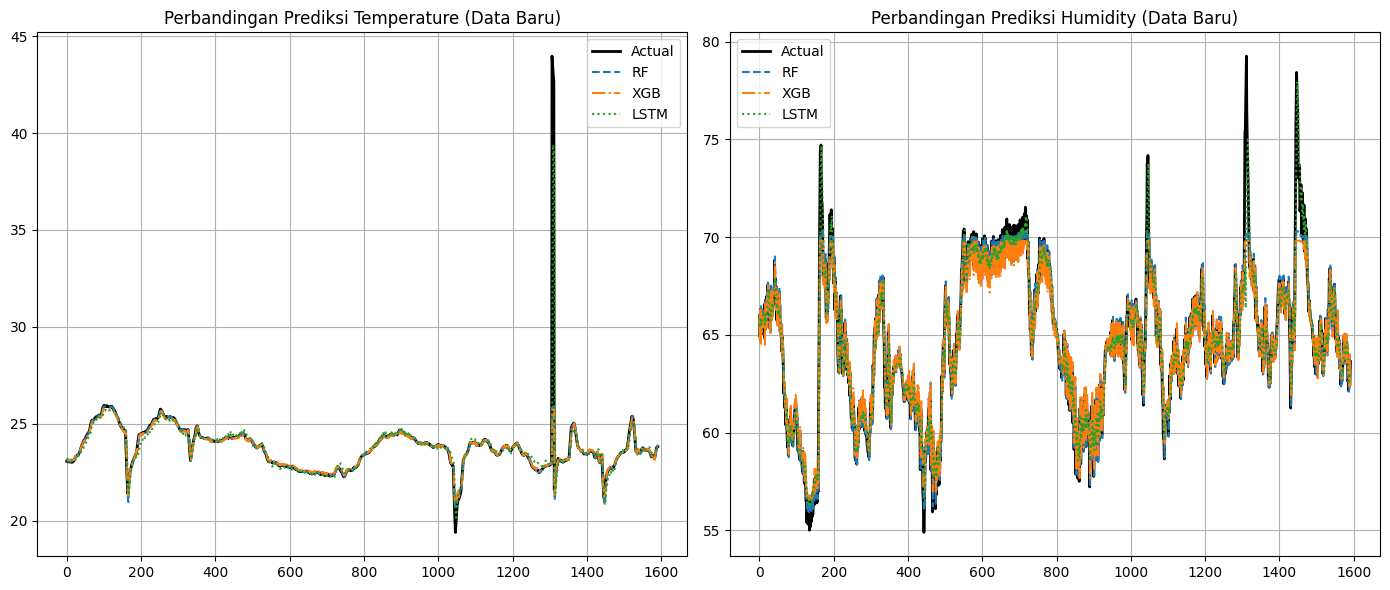

In [67]:
# ======================================================
# === PREDIKSI DATA BARU DENGAN 3 MODEL TERLATIH ===
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Baca Data Baru ===
path = r"D:/KULIAH/S2/Semester 3/Predictive Time Inteligence - 3/Codingan/Codingan_Tugas_KakYosia/thingspeak_icpms_1000_20251024_192409.csv"
df_new = pd.read_csv(path)

# Pastikan nama kolom sesuai
df_new.rename(columns={'field1': 'Temperature', 'field2': 'Humidity'}, inplace=True)
df_new = df_new.dropna(subset=['Temperature', 'Humidity'])

# Urutkan data berdasarkan waktu jika ada kolom waktu
if 'created_at' in df_new.columns:
    df_new['created_at'] = pd.to_datetime(df_new['created_at'])
    df_new = df_new.sort_values('created_at').reset_index(drop=True)

print(f"Data baru berhasil dibaca: {df_new.shape[0]} baris")

# === 2. Haluskan Data Baru (Rolling Mean seperti data training) ===
df_new['Temperature'] = df_new['Temperature'].rolling(window=6).mean()
df_new['Humidity'] = df_new['Humidity'].rolling(window=6).mean()
df_new.dropna(inplace=True)

# === 3. Buat fitur lag sama seperti training ===
for lag in range(1, 7):
    df_new[f'Temp_t-{lag}'] = df_new['Temperature'].shift(lag)
    df_new[f'Hum_t-{lag}'] = df_new['Humidity'].shift(lag)
df_new.dropna(inplace=True)

# === 4. Siapkan fitur baru ===
X_new = df_new[[f'Temp_t-{i}' for i in range(1,4)] + [f'Hum_t-{i}' for i in range(1,4)]]

# Gunakan scaler_X yang sudah dilatih
X_new_scaled = scaler_X.transform(X_new)

# === 5. Prediksi menggunakan model lama ===
# Random Forest & XGBoost (langsung 2D input)
pred_rf_temp = rf_temp.predict(X_new_scaled)
pred_rf_hum  = rf_hum.predict(X_new_scaled)

pred_xgb_temp = xgb_temp.predict(X_new_scaled)
pred_xgb_hum  = xgb_hum.predict(X_new_scaled)

# LSTM butuh 3D input
X_new_lstm = X_new_scaled.reshape((X_new_scaled.shape[0], 1, X_new_scaled.shape[1]))
pred_lstm_temp = model_temp.predict(X_new_lstm)
pred_lstm_hum  = model_hum.predict(X_new_lstm)

# === 6. Inverse Transform ke skala asli ===
def inverse(scaler, arr): return scaler.inverse_transform(arr.reshape(-1, 1))

pred_rf_temp_inv = inverse(scaler_y_temp, pred_rf_temp)
pred_rf_hum_inv  = inverse(scaler_y_hum, pred_rf_hum)
pred_xgb_temp_inv = inverse(scaler_y_temp, pred_xgb_temp)
pred_xgb_hum_inv  = inverse(scaler_y_hum, pred_xgb_hum)
pred_lstm_temp_inv = inverse(scaler_y_temp, pred_lstm_temp)
pred_lstm_hum_inv  = inverse(scaler_y_hum, pred_lstm_hum)

# === 7. Gabungkan hasil ke DataFrame untuk evaluasi ===
eval_df = pd.DataFrame({
    "Temperature_Actual": df_new["Temperature"].values,
    "Humidity_Actual": df_new["Humidity"].values,
    "RF_Temp": pred_rf_temp_inv.flatten(),
    "XGB_Temp": pred_xgb_temp_inv.flatten(),
    "LSTM_Temp": pred_lstm_temp_inv.flatten(),
    "RF_Hum": pred_rf_hum_inv.flatten(),
    "XGB_Hum": pred_xgb_hum_inv.flatten(),
    "LSTM_Hum": pred_lstm_hum_inv.flatten()
})

# === 8. Evaluasi Kinerja di Data Baru ===
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

models = ["RF", "XGB", "LSTM"]

print("\n=== Evaluasi Model di Data Baru (Temperature) ===")
for m in models:
    rmse, r2 = evaluate(eval_df["Temperature_Actual"], eval_df[f"{m}_Temp"])
    print(f"{m:5s} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

print("\n=== Evaluasi Model di Data Baru (Humidity) ===")
for m in models:
    rmse, r2 = evaluate(eval_df["Humidity_Actual"], eval_df[f"{m}_Hum"])
    print(f"{m:5s} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

# === 9. Visualisasi Prediksi ===
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(eval_df["Temperature_Actual"], label="Actual", color='black', linewidth=2)
plt.plot(eval_df["RF_Temp"], label="RF", linestyle='--')
plt.plot(eval_df["XGB_Temp"], label="XGB", linestyle='-.')
plt.plot(eval_df["LSTM_Temp"], label="LSTM", linestyle=':')
plt.title("Perbandingan Prediksi Temperature (Data Baru)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(eval_df["Humidity_Actual"], label="Actual", color='black', linewidth=2)
plt.plot(eval_df["RF_Hum"], label="RF", linestyle='--')
plt.plot(eval_df["XGB_Hum"], label="XGB", linestyle='-.')
plt.plot(eval_df["LSTM_Hum"], label="LSTM", linestyle=':')
plt.title("Perbandingan Prediksi Humidity (Data Baru)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#

In [ ]:
# ======================================================
# === SIMPAN SEMUA MODEL DAN SCALER TERPISAH ===
# ======================================================

import joblib

# Tentukan folder penyimpanan (buat jika belum ada)
import os
save_dir = r"D:/KULIAH/S2/Semester 3/Predictive Time Inteligence - 3/Codingan/Codingan_Tugas_KakYosia/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Misal rf_temp, rf_hum adalah model RandomForestRegressor
joblib.dump(rf_temp, os.path.join(save_dir, "model_rf_temperature.pkl"))
joblib.dump(rf_hum,  os.path.join(save_dir, "model_rf_humidity.pkl"))

# Misal xgb_temp, xgb_hum adalah model XGBoost
joblib.dump(xgb_temp, os.path.join(save_dir, "model_xgb_temperature.pkl"))
joblib.dump(xgb_hum,  os.path.join(save_dir, "model_xgb_humidity.pkl"))

# LSTM sudah benar
model_temp.save(os.path.join(save_dir, "model_lstm_temperature.h5"))
model_hum.save(os.path.join(save_dir, "model_lstm_humidity.h5"))

# Scaler
joblib.dump(scaler_X, os.path.join(save_dir, "scaler_X.pkl"))
joblib.dump(scaler_y_temp, os.path.join(save_dir, "scaler_y_temperature.pkl"))
joblib.dump(scaler_y_hum,  os.path.join(save_dir, "scaler_y_humidity.pkl"))

print("\n Semua model & scaler berhasil disimpan di folder:")
print(save_dir)



 Semua model & scaler berhasil disimpan di folder:
D:/KULIAH/S2/Semester 3/Predictive Time Inteligence - 3/Codingan/Codingan_Tugas_KakYosia/saved_models
